In [1]:
import matplotlib as mpl
mpl.rcParams['figure.facecolor'] = 'w'

In [2]:
import numpy as np, pylab as plt, pandas as pd

In [10]:
from scipy.ndimage import measurements

def check_percolation(z):
    featureLabels, numFeatures = measurements.label(z)
    area = measurements.sum(z, featureLabels, index=np.arange(featureLabels.max() + 1))
    areaImg = area[featureLabels] + featureLabels*0.01
    sliced = measurements.find_objects(areaImg == areaImg.max())
    cluster_dimensions = np.array([int(sliced[0][i].stop-sliced[0][i].start) for i in range(len(z.shape))])
    doesPercolate = np.any(((cluster_dimensions/np.array(z.shape))).astype(int))
    return doesPercolate

def get_percolation_limit(valenceArray):
    percolationLimitReached = False
    for valenceLevel in np.arange(0.01,3,0.01):
        valenceDoesPercolate = check_percolation( valenceArray < valenceLevel )
        if valenceDoesPercolate:
            percolationLimitReached = True
            percolationLimit = valenceLevel
            break
    assert percolationLimitReached, 'check percolation limit'
    return percolationLimit
    

In [11]:
percolationLimits = {}

In [12]:
for c in 'nts nhs nys nes lts lhs lys les'.split():
    
    with open('{}_neutron.grd'.format(c.upper())) as f:
        ct = f.readlines()
        
    V = np.array(ct[3].split()).astype(float)
    lofmesh = int(round(len(V)**(1/3.),0))
    Vshape = tuple(int(i) for i in ct[2].split())
    V = V.reshape(Vshape)    
    
    percolationLimits[c] = get_percolation_limit(V)

In [13]:
percolationLimits

{'nts': 1.8900000000000001,
 'nhs': 1.8800000000000001,
 'nys': 1.85,
 'nes': 1.85,
 'lts': 0.86,
 'lhs': 0.87,
 'lys': 0.93,
 'les': 0.89}

In [8]:
nas = np.array([percolationLimits[al] for al in ['nts','nhs','nys','nes']])
lis = np.array([percolationLimits[al] for al in ['lts','lhs','lys','les']])
lans = ['Tb','Ho','Y','Er']

KeyError: 'nhs'

In [ ]:
plt.rc('font', **{'family' : 'serif', 'size'   : 18})
fig,ax = plt.subplots(1,1,figsize=(7.5,5))
plt.setp(ax.spines.values(), linewidth=2)

x = np.arange(4)
dx = 0.4
for n,(als,alk) in enumerate(zip([nas,lis],['Na','Li'])):
    ax.bar(x-dx/2+dx*n,als,width=dx,label=alk)
    
ax.set_xticks(x)
ax.set_xticklabels(lans)
ax.set_ylabel('E$_a$ / eV')
ax.set_xlabel('Lanthanide')

ax.legend(loc='upper center', bbox_to_anchor=(0.85, 0.8),
          ncol=1)

plt.savefig('Ea_bar.pdf',bbox_inches='tight')

NameError: name 'x' is not defined

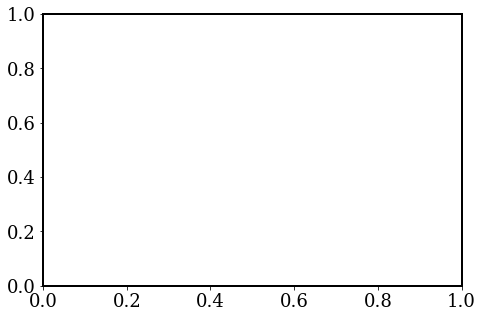

In [9]:
plt.rc('font', **{'family' : 'serif', 'size'   : 18})
fig,ax = plt.subplots(1,1,figsize=(7.5,5))
plt.setp(ax.spines.values(), linewidth=2)

ax.plot(x,nas,'-o',label='Na',ms=12)
ax2 = ax.twinx()
ax2.plot(x,lis,'-o',color='C1',label='Li',ms=12)

ax.set_xticks(x)
ax.set_xticklabels(lans)

ax.legend(loc=6)
ax2.legend(loc=1)
ax.spines['left'].set_color('C0')
ax2.spines['left'].set_color('C0')
ax.spines['right'].set_color('C1')
ax2.spines['right'].set_color('C1')
#ax.yaxis.label.set_color('C0')
#ax2.yaxis.label.set_color('C1')
ax.tick_params(axis='y', colors='C0')
ax2.tick_params(axis='y', colors='C1')

ax.set_ylabel('E$_a$ / eV')
ax2.set_ylabel('E$_a$ / eV')
ax.set_xlabel('Lanthanide')

plt.savefig('BVEL_Ea.pdf',bbox_inches='tight')

In [199]:
ionicRadii = {'Gd':0.938,'Tb':0.923, 'Dy':0.912, 'Ho':0.901, 'Y':0.9, 'Er':0.89, 'Yb':0.868, 'Lu':0.861}

lnNames = 'Tb Ho Y Er'.split()

na_compounds = 'nts nhs nys nes'.split()
na_dirnames = {c:'newIrf_rietveld' for c in na_compounds}
na_lns = {c:{'ln':ln,'alk':'Na'} for (c,ln) in zip(na_compounds,lnNames)}

li_compounds = 'lts lhs lys les'.split()
li_dirnames = {c:'aClean' for c in li_compounds}
li_lns = {c:{'ln':ln,'alk':'Li'} for (c,ln) in zip(li_compounds,lnNames)}

info = {**na_lns,**li_lns}

compounds = na_compounds + li_compounds
dirname = {**na_dirnames,**li_dirnames}

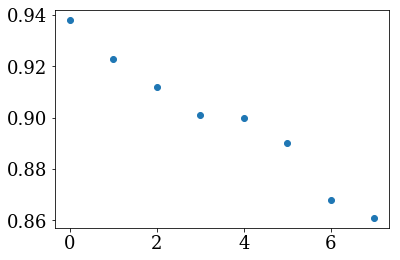

In [202]:
plt.plot(ionicRadii.values(),'o')

In [203]:
for c in ['lgs','lds','ngs','nds']:
    
    with open('{}_neutron.grd'.format(c.upper())) as f:
        ct = f.readlines()
        
    V = np.array(ct[3].split()).astype(float)
    lofmesh = int(round(len(V)**(1/3.),0))
    Vshape = tuple(int(i) for i in ct[2].split())
    V = V.reshape(Vshape)    
    
    percolationLimits[c] = get_percolation_limit(V)

In [204]:
nas = np.array([percolationLimits[al] for al in ['ngs','nts','nds','nhs','nes']])
lis = np.array([percolationLimits[al] for al in ['lgs','lts','lds','lhs','les']])
lans = ['Gd','Tb','Dy','Ho','Er']

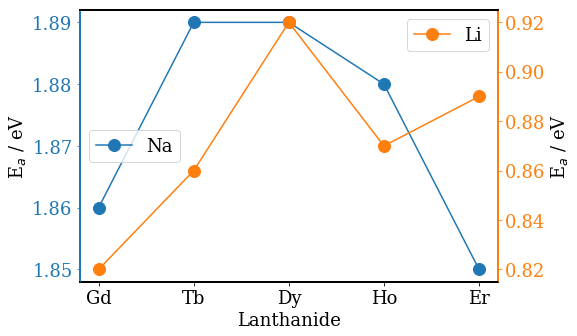

In [207]:
plt.rc('font', **{'family' : 'serif', 'size'   : 18})
fig,ax = plt.subplots(1,1,figsize=(7.5,5))
plt.setp(ax.spines.values(), linewidth=2)

x = np.arange(5)
ax.plot(x,nas,'-o',label='Na',ms=12)
ax2 = ax.twinx()
ax2.plot(x,lis,'-o',color='C1',label='Li',ms=12)

ax.set_xticks(x)
ax.set_xticklabels(lans)

ax.legend(loc=6)
ax2.legend(loc=1)
ax.spines['left'].set_color('C0')
ax2.spines['left'].set_color('C0')
ax.spines['right'].set_color('C1')
ax2.spines['right'].set_color('C1')
#ax.yaxis.label.set_color('C0')
#ax2.yaxis.label.set_color('C1')
ax.tick_params(axis='y', colors='C0')
ax2.tick_params(axis='y', colors='C1')

ax.set_ylabel('E$_a$ / eV')
ax2.set_ylabel('E$_a$ / eV')
ax.set_xlabel('Lanthanide')

plt.savefig('BVEL_Ea_mod.pdf',bbox_inches='tight')

In [130]:
import pickle

In [131]:
#with open('percolation_limits.pkl','wb') as f:
#    pickle.dump(percolationLimits,f)

In [142]:
with open('NHS_neutron.grd') as f:
    ct = f.readlines()

In [143]:
V = np.array(ct[3].split()).astype(float)
lofmesh = int(round(len(V)**(1/3.),0))
Vshape = tuple(int(i) for i in ct[2].split())
V = V.reshape(Vshape)    

In [147]:
check_percolation(V<1.88)

True